In [1]:
import numpy as np
import cv2  # OpenCV for image manipulation (optional)
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('masks_cordinates.csv')
df.head()

,path,x1,y1,x2,y2
0,141.png,341,213,357,228
1,67.png,221,207,252,228
2,139.png,331,146,375,211
3,163.png,380,342,395,357
4,126.png,348,263,365,277


In [4]:
paths = df['path'].tolist()
x1s = df['x1'].tolist()
y1s = df['y1'].tolist()
x2s = df['x2'].tolist()
y2s = df['y2'].tolist()

paths[:5]

['141.png', '67.png', '139.png', '163.png', '126.png']

In [9]:
print('Segments\\' + str(paths[0]))

Segments\141.png


In [10]:
s_image = cv2.imread('Segments/' + str(paths[0]))

In [11]:
# print height and width of image
s_height, s_width, _ = s_image.shape
print(s_height, s_width)

512 512


------

In [12]:
def mask_show(image_path, x1, y1, x2, y2):
    image = cv2.imread('Segments/' + str(image_path))
    height, width = image.shape[:2]
    binary_mask = np.zeros((height, width), dtype=np.uint8)
    binary_mask[y1:y2, x1:x2] = 1

    # Display the binary mask using Matplotlib
    plt.imshow(binary_mask, cmap='gray')  # Use 'gray' colormap for binary images
    plt.title('Binary Mask')
    plt.axis('off')  # Turn off axis labels and ticks
    plt.show()

    return binary_mask

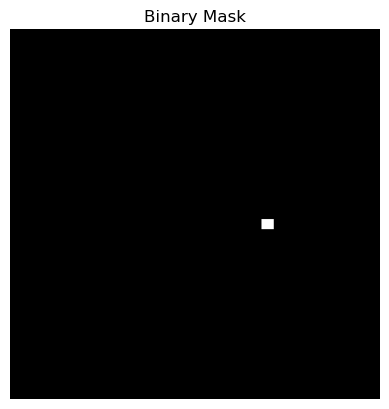

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [13]:
image_path, x1, y1, x2, y2 = paths[4], x1s[4], y1s[4], x2s[4], y2s[4]

mask_show(image_path, x1, y1, x2, y2)

----

In [14]:
def mask(image_path, x1, y1, x2, y2):
    image = cv2.imread('Segments/' + str(image_path))
    height, width = image.shape[:2]
    binary_mask = np.zeros((height, width), dtype=np.uint8)
    binary_mask[y1:y2, x1:x2] = 1

    cv2.imwrite('Masks/' + str(image_path), binary_mask * 255)  # Scale by 255 to convert from [0, 1] to [0, 255]

In [15]:
for image_path, x1, y1, x2, y2 in zip(paths, x1s, y1s, x2s, y2s):
    mask(image_path, x1, y1, x2, y2)

print('Done')

Done
